In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


In [11]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
11/11 [==============================] - 2s 28ms/step - loss: 534.9650 - mae: 21.2140 - val_loss: 563.4124 - val_mae: 21.8923
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 469.4310 - mae: 19.5013 - val_loss: 484.8638 - val_mae: 19.9763
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 388.7391 - mae: 17.2787 - val_loss: 380.8306 - val_mae: 17.2989
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 285.0828 - mae: 14.3287 - val_loss: 256.5194 - val_mae: 13.7258
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 171.2224 - mae: 10.7202 - val_loss: 137.0709 - val_mae: 9.4670
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 82.5902 - mae: 7.0066 - val_loss: 65.7661 - val_mae: 6.1527
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 49.0260 - mae: 5.2029 - val_loss: 46.9847 - val_mae: 5.3002
Epoch 8/100
11/11 [==============================

11/11 [==============================] - 0s 3ms/step - loss: 8.9421 - mae: 2.1729 - val_loss: 15.0650 - val_mae: 2.8507
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 8.8560 - mae: 2.0874 - val_loss: 14.2284 - val_mae: 2.7495
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 8.6678 - mae: 2.0705 - val_loss: 14.6363 - val_mae: 2.7608
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 8.3981 - mae: 2.0555 - val_loss: 14.4284 - val_mae: 2.7362
Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 8.3720 - mae: 2.0522 - val_loss: 14.3921 - val_mae: 2.7373
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 8.3213 - mae: 2.0442 - val_loss: 14.3981 - val_mae: 2.7507
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 8.3246 - mae: 2.0364 - val_loss: 14.5377 - val_mae: 2.7916
Epoch 69/100
11/11 [==============================] - 0s 3ms/step - loss: 8.3241 -

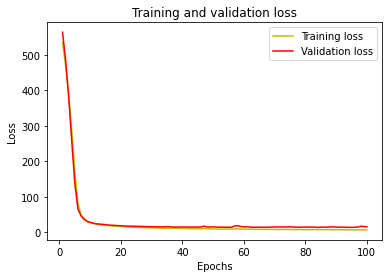

In [13]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 26.5345 - mae: 3.1016
Mean squared error from neural net:  26.534530639648438
Mean absolute error from neural net:  3.101623773574829


In [15]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])


1/1 [==============================] - 0s 111ms/step
Predicted values are:  [[ 7.802572]
 [18.392782]
 [20.680792]
 [33.3337  ]
 [25.277048]]
Real values are:  [ 7.2 18.8 19.  27.  22.2]


In [16]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  23.195599256422977
Mean absolute error from linear regression:  3.4641858124067166
